Total Reward:
2231


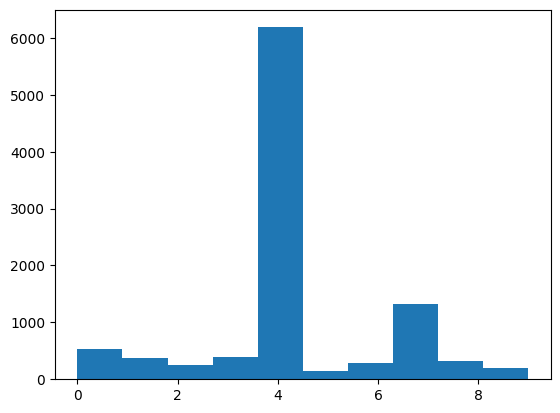

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data=pd.read_csv('../datasources/Ads_CTR_Optimisation.csv')
#print(data)

#Random Selection
'''
import random

N=10000
d=10
sum=0
selects=[]
for n in range(0,N):
    ad=random.randrange(d)
    selects.append(ad)
    award=data.values[n,ad]
    sum=sum+award
    
plt.hist(selects)
plt.show()
'''
import math
#UCB
N = 10000 # 10.000 click
d = 10  # There are 10 ads in total
#Ri(n)
awards = [0] * d #At first, the reward for all ads is 0
#Ni(n)
clicks = [0] * d #clicks so far
sum = 0 # total reward
selects = []
for n in range(1,N):
    ad = 0 #selected ad
    max_ucb = 0
    for i in range(0,d):
        if(clicks[i] > 0):
            average = awards[i] / clicks[i]
            delta = math.sqrt(3/2* math.log(n)/clicks[i])
            ucb = average + delta
        else:
            ucb = N*10
        if max_ucb < ucb: #A big ucb came out of max
            max_ucb = ucb
            ad = i          
    selects.append(ad)
    clicks[ad] = clicks[ad]+ 1
    award = data.values[n,ad] # n in the data. if row = 1 the reward is 1
    awards[ad] = awards[ad]+ award
    sum = sum+ award
print('Total Reward:')   
print(sum)

plt.hist(selects)
plt.show()



